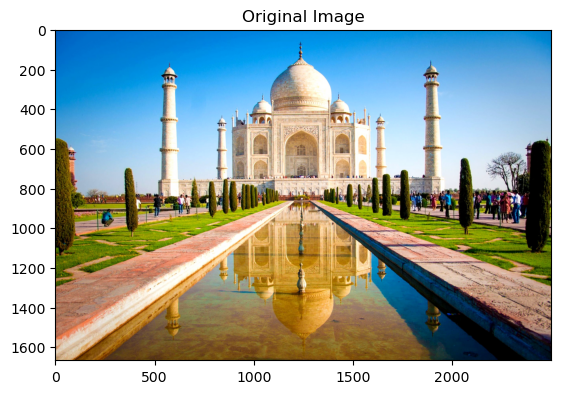

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('taj.jpg')

# Convert the image to RGB (OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(img_rgb)
plt.title('Original Image')
plt.show()


# UNIFORM NOISE

C:\Users\janan\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


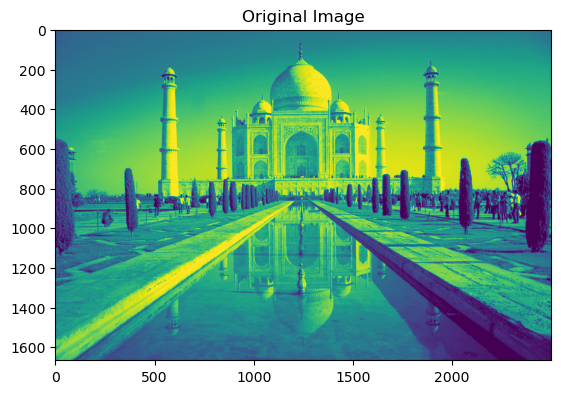

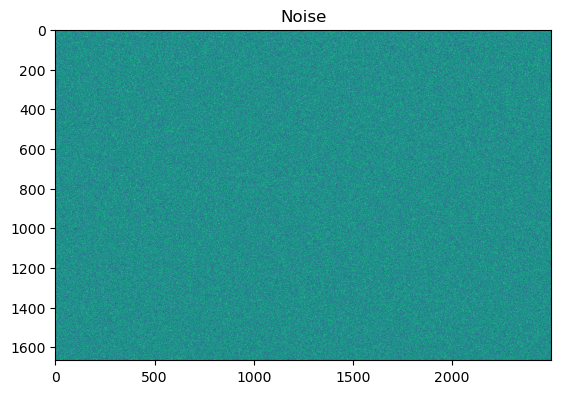

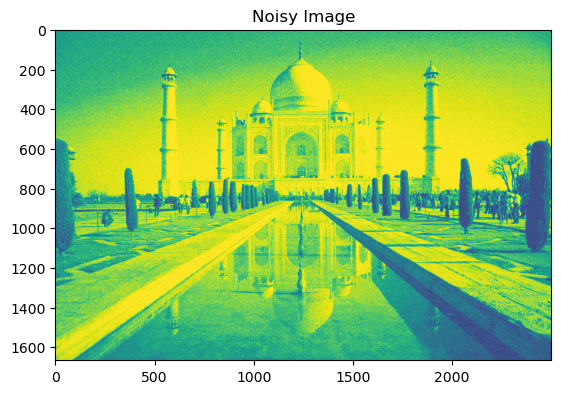

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte

# orginal image
img = cv2.imread('taj.jpg',0)
img = img/255

# uniform noise
x, y = img.shape
a = 0
b = 0.5
n = np.zeros((x,y), dtype=np.float64)
for i in range(x):
    for j in range(y):
        n[i][j] = np.random.uniform(a,b)
        
# add noise to image
noise_img = img + n
noise_img = np.clip(noise_img, 0, 1)

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.show()

# Display the Noise
plt.imshow(n)
plt.title('Noise')
plt.show()

# Display the Noisy image
plt.imshow(noise_img)
plt.title('Noisy Image')
plt.show()


# Gaussian Noise

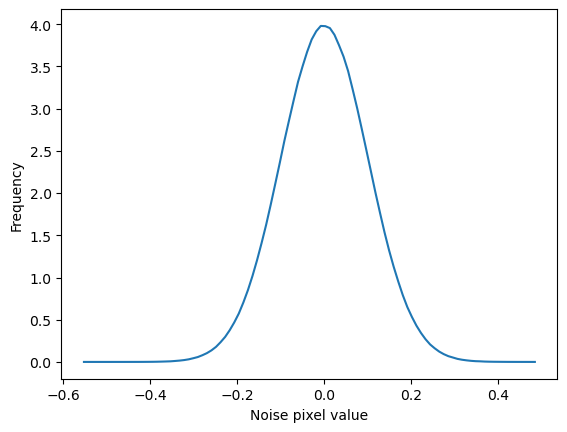

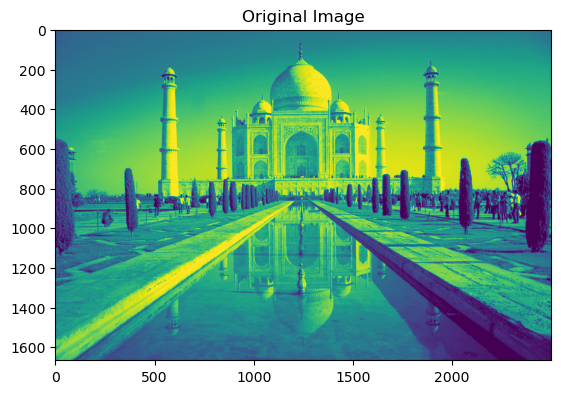

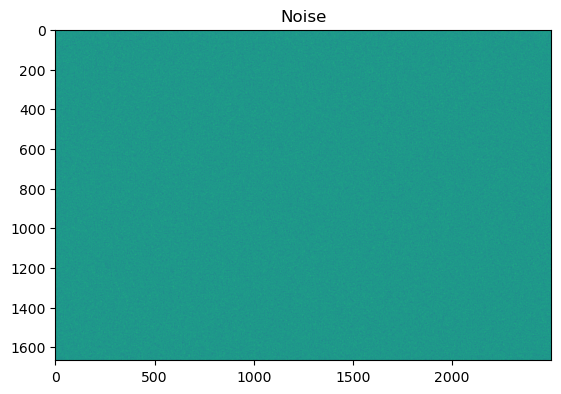

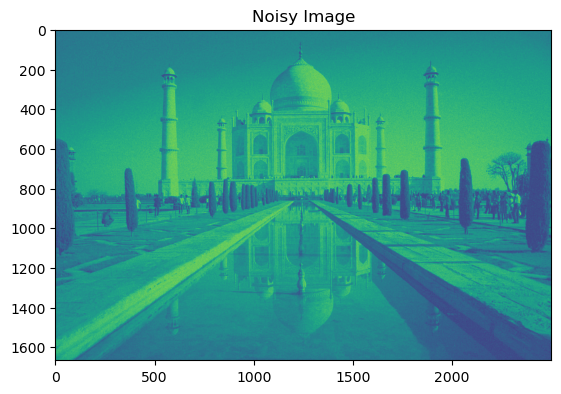

In [3]:
from scipy.stats import gaussian_kde

# create gaussian noise
x, y = img.shape
mean = 0
var = 0.01
sigma = np.sqrt(var)
n1 = np.random.normal(loc=mean, 
                     scale=sigma, 
                     size=(x,y))

# display the probability density function (pdf)
kde = gaussian_kde(n1.reshape(int(x*y)))
dist_space = np.linspace(np.min(n1), np.max(n1), 100)
plt.plot(dist_space, kde(dist_space))
plt.xlabel('Noise pixel value'); plt.ylabel('Frequency')
plt.show()

# add a gaussian noise
g = img + n1

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.show()

# Display the Noise
plt.imshow(n1)
plt.title('Noise')
plt.show()

# Display the Noisy image
plt.imshow(g)
plt.title('Noisy Image')
plt.show()


# Salt and Pepper Noise

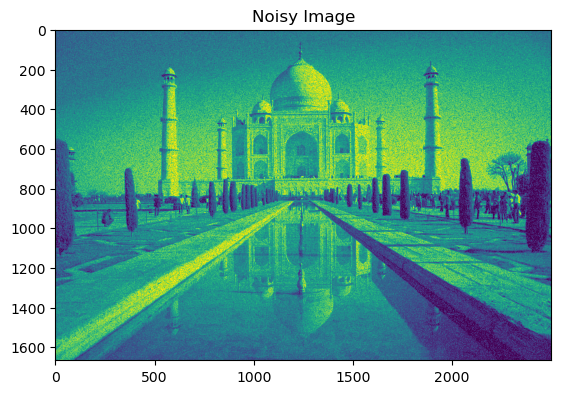

In [4]:

# blank image
x,y = img.shape
g1 = np.zeros((x,y), dtype=np.float32)

# salt and pepper amount
pepper = 0.1
salt = 0.95

# create salt and peper noise image    
for i in range(x):
    for j in range(y):
        rdn = np.random.random()
        if rdn < pepper:
            g1[i][j] = 0
        elif rdn > salt:
            g1[i][j] = 1
        else:
            g1[i][j] = img[i][j]

# Display the Noisy image
plt.imshow(g1)
plt.title('Noisy Image')
plt.show()


# Smoothing Filter

# Mean Filter

In [5]:
# mean filter (average)
m = 7
n = 5
denoise_mean = cv2.blur(g, (m,n))

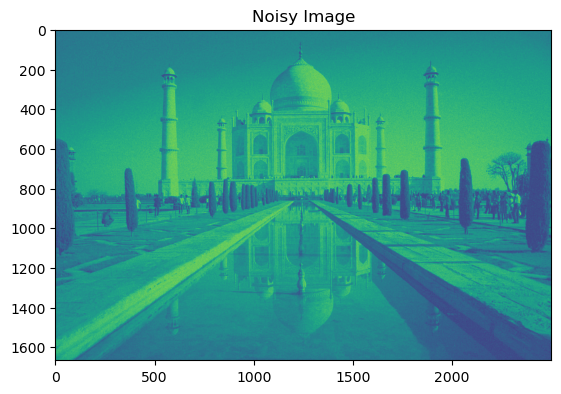

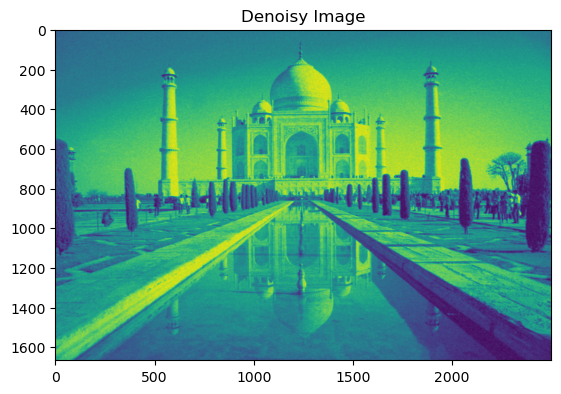

In [6]:
# Display the Noisy image
plt.imshow(g)
plt.title('Noisy Image')
plt.show()

# Display the Denoisy image
plt.imshow(denoise_mean)
plt.title('Denoisy Image')
plt.show()

# Median Filter

In [9]:
img_noise_median = np.clip(g1, -1, 1) #pixel value range
img_noise_median = img_as_ubyte(img_noise_median) #convert to uint8
denoise_median = cv2.medianBlur(img_noise_median, 5)

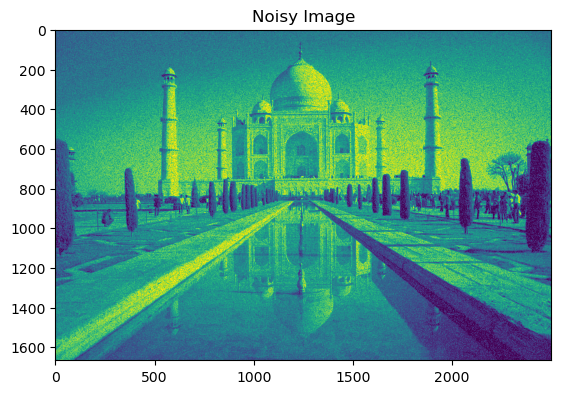

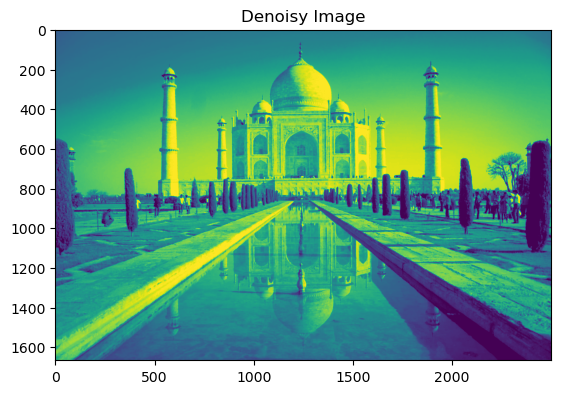

In [12]:
# Display the Noisy image
plt.imshow(g1)
plt.title('Noisy Image')
plt.show()

# Display the Noisy image
plt.imshow(denoise_median)
plt.title('Denoisy Image')
plt.show()

# NightVision Image Enhancement

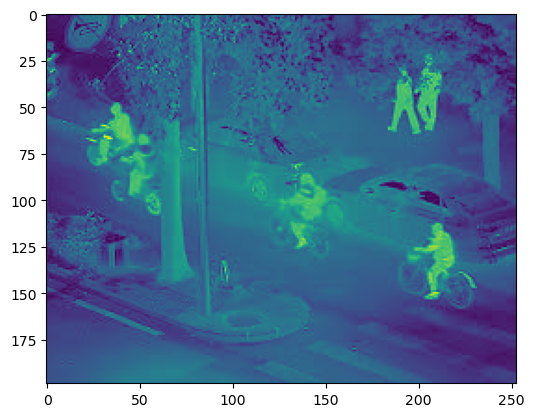

In [ ]:
image = cv2.imread('NightVision .jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.show()

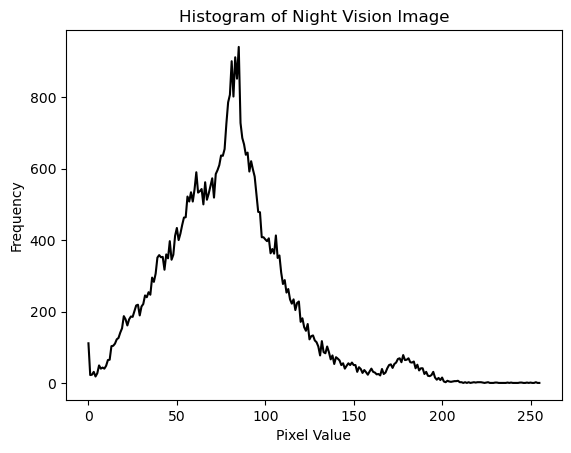

# Histogram Equalisation

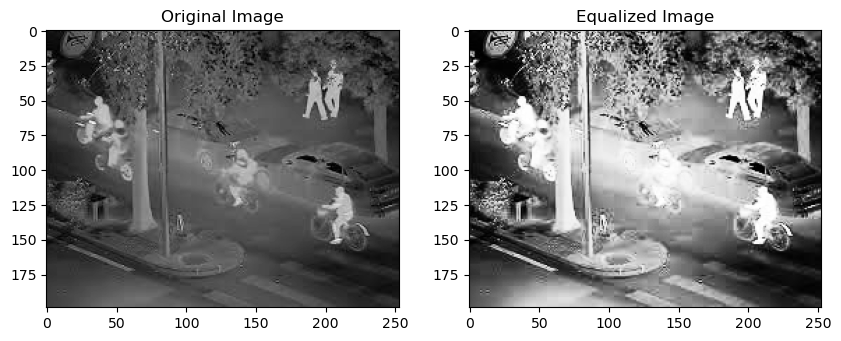

In [27]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()


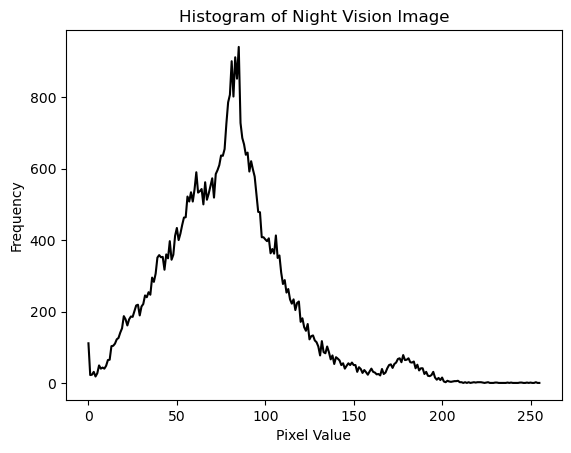

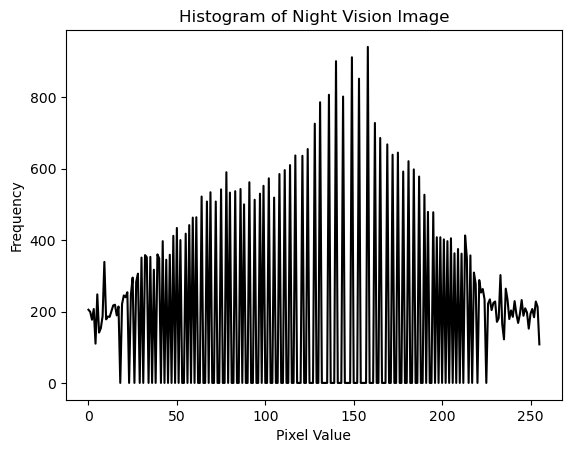

In [32]:
# Calculate histogram
histogram1 = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(histogram1, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Night Vision Image')
plt.show()

histogram2 = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
plt.plot(histogram2, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Night Vision Image')
plt.show()


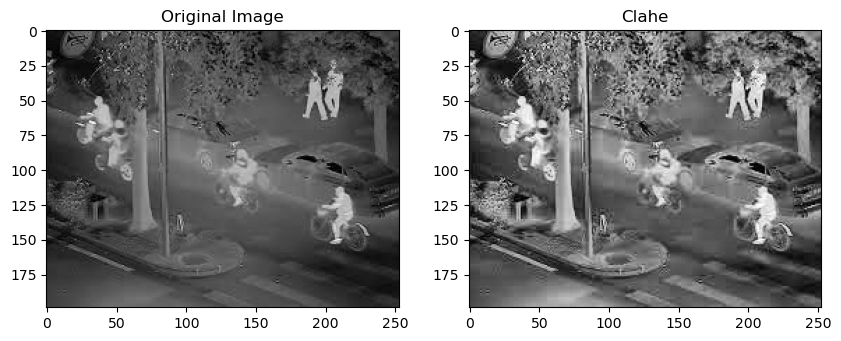

In [30]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('Clahe')

plt.show()

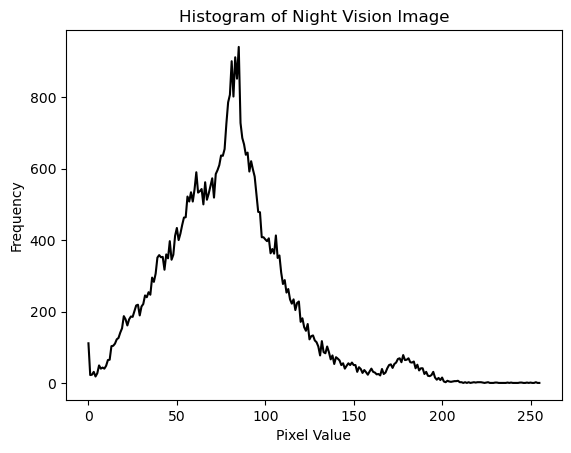

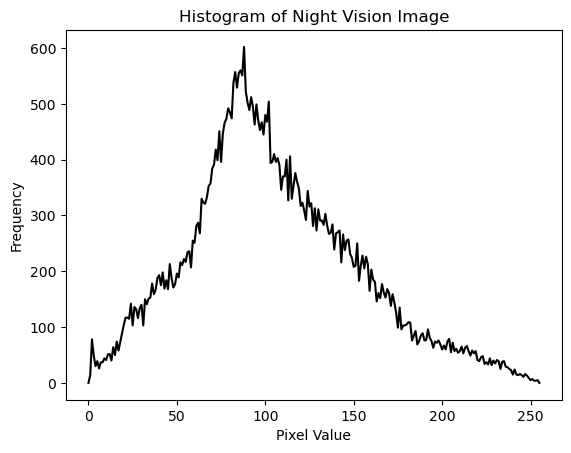

In [33]:
# Calculate histogram
histogram3 = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(histogram3, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Night Vision Image')
plt.show()




histogram4= cv2.calcHist([clahe_image], [0], None, [256], [0, 256])

plt.plot(histogram4, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Night Vision Image')
plt.show()
